# ЛР №2

### Используются данные country vaccinations

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка и первичный анализ данных 

In [14]:
data = pd.read_csv('country_vaccinations.csv', sep=",")

In [15]:
# размер набора данных
data.shape

(3555, 15)

In [16]:
# типы колонок
data.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [17]:
# проверим есть ли пропущенные значения
data.isnull().sum()

country                                   0
iso_code                                272
date                                      0
total_vaccinations                     1214
people_vaccinated                      1615
people_fully_vaccinated                2277
daily_vaccinations_raw                 1583
daily_vaccinations                      135
total_vaccinations_per_hundred         1214
people_vaccinated_per_hundred          1615
people_fully_vaccinated_per_hundred    2277
daily_vaccinations_per_million          135
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [18]:
# Первые 5 строк датасета
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [19]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 3555


## Обработка пропусков в данных 

In [20]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((3555, 15), (3555, 5))

In [21]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((3555, 15), (995, 15))

In [22]:
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [23]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,0.0,0.0,0.0,0.0,64.0,0.00,0.00,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,0.0,0.0,64.0,0.00,0.00,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,0.0,60.0,63.0,0.01,0.01,0.0,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,0.0,78.0,66.0,0.01,0.01,0.0,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


## "Внедрение значений" - импьютация (imputation)
### Обработка пропусков в числовых данных

In [24]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка total_vaccinations. Тип данных float64. Количество пустых значений 1214, 34.15%.
Колонка people_vaccinated. Тип данных float64. Количество пустых значений 1615, 45.43%.
Колонка people_fully_vaccinated. Тип данных float64. Количество пустых значений 2277, 64.05%.
Колонка daily_vaccinations_raw. Тип данных float64. Количество пустых значений 1583, 44.53%.
Колонка daily_vaccinations. Тип данных float64. Количество пустых значений 135, 3.8%.
Колонка total_vaccinations_per_hundred. Тип данных float64. Количество пустых значений 1214, 34.15%.
Колонка people_vaccinated_per_hundred. Тип данных float64. Количество пустых значений 1615, 45.43%.
Колонка people_fully_vaccinated_per_hundred. Тип данных float64. Количество пустых значений 2277, 64.05%.
Колонка daily_vaccinations_per_million. Тип данных float64. Количество пустых значений 135, 3.8%.


In [25]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
1,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0
2,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0
3,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0
4,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0
...,...,...,...,...,...,...,...,...,...
3550,790211.0,784809.0,5402.0,13987.0,26206.0,25.06,24.89,0.17,8312.0
3551,803178.0,795927.0,7251.0,12967.0,24418.0,25.47,25.24,0.23,7745.0
3552,820339.0,807351.0,12988.0,17161.0,23033.0,26.02,25.61,0.41,7305.0
3553,841975.0,822633.0,19342.0,21636.0,22012.0,26.70,26.09,0.61,6982.0


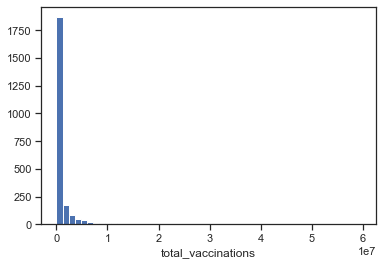

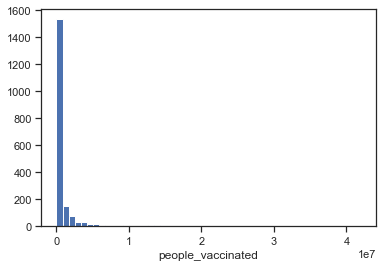

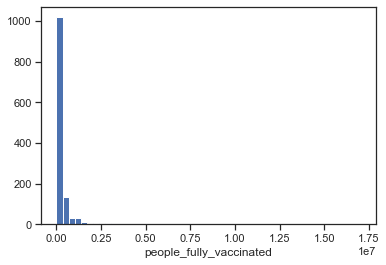

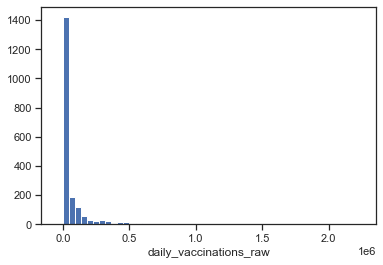

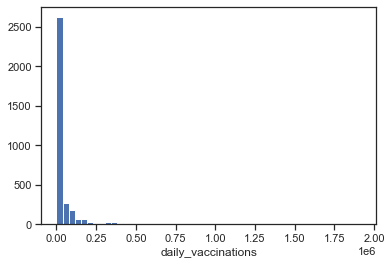

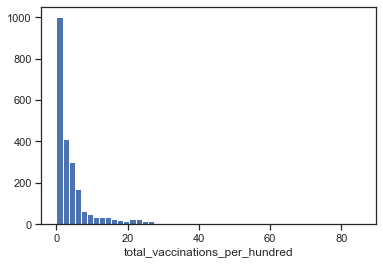

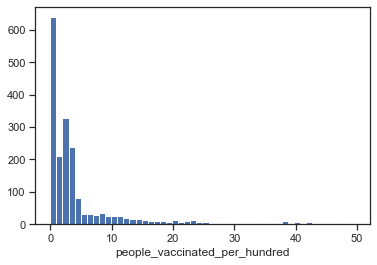

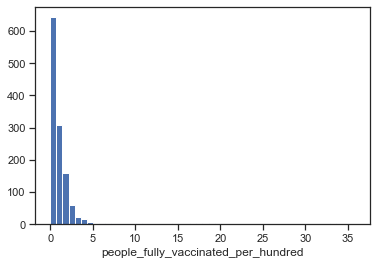

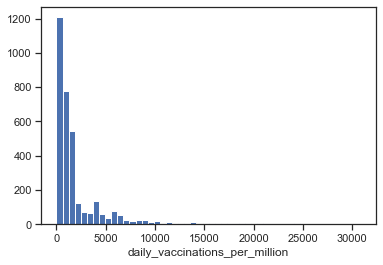

In [26]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [56]:
data_num_total_vaccinations = data_num[['total_vaccinations']]
data_num_total_vaccinations.head()

,total_vaccinations
0,0.0
1,NaN
2,128.0
3,188.0
4,266.0


In [29]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [57]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_total_vaccinations)
mask_missing_values_only

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [31]:
strategies=['mean', 'median', 'most_frequent']

In [58]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_total_vaccinations)
    return data_num_imp[mask_missing_values_only]

In [33]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([1486318.75651431, 1486318.75651431, 1486318.75651431, ...,
        1486318.75651431, 1486318.75651431, 1486318.75651431]))

In [34]:
strategies[1], test_num_impute(strategies[1])

('median', array([189525., 189525., 189525., ..., 189525., 189525., 189525.]))

In [35]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([0., 0., 0., ..., 0., 0., 0.]))

In [36]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [37]:
data[['people_vaccinated']].describe()

,people_vaccinated
count,1.940000e+03
mean,1.238670e+06
std,4.052163e+06
min,0.000000e+00
25%,2.636475e+04
50%,1.661540e+05
75%,6.296642e+05
max,4.197740e+07


In [38]:
test_num_impute_col(data, 'people_vaccinated', strategies[0])

('people_vaccinated', 'mean', 1615, 1238669.6015463918, 1238669.6015463918)

In [39]:
test_num_impute_col(data, 'people_vaccinated', strategies[1])

('people_vaccinated', 'median', 1615, 166154.0, 166154.0)

In [40]:
test_num_impute_col(data, 'people_vaccinated', strategies[2])

('people_vaccinated', 'most_frequent', 1615, 0.0, 0.0)

## Обработка пропусков в категориальных данных 

In [45]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
countr = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        countr.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка iso_code. Тип данных object. Количество пустых значений 272, 7.65%.


In [46]:
countr_data = data[['iso_code']]
countr_data.head()

,iso_code
0,ALB
1,ALB
2,ALB
3,ALB
4,ALB


In [47]:
countr_data['iso_code'].unique()

array(['ALB', 'DZA', 'AND', 'AIA', 'ARG', 'AUT', 'AZE', 'BHR', 'BGD',
       'BRB', 'BEL', 'BMU', 'BOL', 'BRA', 'BGR', 'KHM', 'CAN', 'CYM',
       'CHL', 'CHN', 'COL', 'CRI', 'HRV', 'CYP', 'CZE', 'DNK', 'DOM',
       'ECU', 'EGY', nan, 'EST', 'FRO', 'FIN', 'FRA', 'DEU', 'GIB', 'GRC',
       'GRL', 'GGY', 'GUY', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRL',
       'IMN', 'ISR', 'ITA', 'JPN', 'JEY', 'KWT', 'LVA', 'LIE', 'LTU',
       'LUX', 'MAC', 'MDV', 'MLT', 'MUS', 'MEX', 'MCO', 'MAR', 'MMR',
       'NPL', 'NLD', 'OWID_NCY', 'NOR', 'OMN', 'PAK', 'PAN', 'PER', 'POL',
       'PRT', 'QAT', 'ROU', 'RUS', 'SHN', 'SAU', 'SRB', 'SYC', 'SGP',
       'SVK', 'SVN', 'ZAF', 'ESP', 'LKA', 'SWE', 'CHE', 'TUR', 'TCA',
       'ARE', 'GBR', 'USA'], dtype=object)

In [48]:
countr_data[countr_data['iso_code'].isnull()].shape

(272, 1)

In [60]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(countr_data)
data_imp2

array([['ALB'],
       ['ALB'],
       ['ALB'],
       ...,
       ['GBR'],
       ['GBR'],
       ['GBR']], dtype=object)

In [53]:
np.unique(data_imp2)

array(['AIA', 'ALB', 'AND', 'ARE', 'ARG', 'AUT', 'AZE', 'BEL', 'BGD',
       'BGR', 'BHR', 'BMU', 'BOL', 'BRA', 'BRB', 'CAN', 'CHE', 'CHL',
       'CHN', 'COL', 'CRI', 'CYM', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM',
       'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FRA', 'FRO', 'GBR',
       'GGY', 'GIB', 'GRC', 'GRL', 'GUY', 'HRV', 'HUN', 'IDN', 'IMN',
       'IND', 'IRL', 'IRN', 'ISL', 'ISR', 'ITA', 'JEY', 'JPN', 'KHM',
       'KWT', 'LIE', 'LKA', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO',
       'MDV', 'MEX', 'MLT', 'MMR', 'MUS', 'NLD', 'NOR', 'NPL', 'OMN',
       'OWID_NCY', 'PAK', 'PAN', 'PER', 'POL', 'PRT', 'QAT', 'ROU', 'RUS',
       'SAU', 'SGP', 'SHN', 'SRB', 'SVK', 'SVN', 'SWE', 'SYC', 'TCA',
       'TUR', 'USA', 'ZAF'], dtype=object)

In [76]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(countr_data)
data_imp3

array([['ALB'],
       ['ALB'],
       ['ALB'],
       ...,
       ['NA'],
       ['NA'],
       ['NA']], dtype=object)

In [54]:
np.unique(data_imp3)

array(['AIA', 'ALB', 'AND', 'ARE', 'ARG', 'AUT', 'AZE', 'BEL', 'BGD',
       'BGR', 'BHR', 'BMU', 'BOL', 'BRA', 'BRB', 'CAN', 'CHE', 'CHL',
       'CHN', 'COL', 'CRI', 'CYM', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM',
       'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FRA', 'FRO', 'GBR',
       'GGY', 'GIB', 'GRC', 'GRL', 'GUY', 'HRV', 'HUN', 'IDN', 'IMN',
       'IND', 'IRL', 'IRN', 'ISL', 'ISR', 'ITA', 'JEY', 'JPN', 'KHM',
       'KWT', 'LIE', 'LKA', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO',
       'MDV', 'MEX', 'MLT', 'MMR', 'MUS', 'NA', 'NLD', 'NOR', 'NPL',
       'OMN', 'OWID_NCY', 'PAK', 'PAN', 'PER', 'POL', 'PRT', 'QAT', 'ROU',
       'RUS', 'SAU', 'SGP', 'SHN', 'SRB', 'SVK', 'SVN', 'SWE', 'SYC',
       'TCA', 'TUR', 'USA', 'ZAF'], dtype=object)

In [55]:
data_imp3[data_imp3=='NA'].size

272

## Преобразование категориальных признаков в числовые 

In [61]:
countr_vac = pd.DataFrame({'c1':data_imp2.T[0]})
countr_vac

,c1
0,ALB
1,ALB
2,ALB
3,ALB
4,ALB
...,...
3550,GBR
3551,GBR
3552,GBR
3553,GBR


### Кодирование категорий целочисленными значениями - label encoding 

In [62]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [64]:
le = LabelEncoder()
countr_vac_le = le.fit_transform(countr_vac['c1'])

In [65]:
countr_vac['c1'].unique()

array(['ALB', 'DZA', 'AND', 'AIA', 'ARG', 'AUT', 'AZE', 'BHR', 'BGD',
       'BRB', 'BEL', 'BMU', 'BOL', 'BRA', 'BGR', 'KHM', 'CAN', 'CYM',
       'CHL', 'CHN', 'COL', 'CRI', 'HRV', 'CYP', 'CZE', 'DNK', 'DOM',
       'ECU', 'EGY', 'GBR', 'EST', 'FRO', 'FIN', 'FRA', 'DEU', 'GIB',
       'GRC', 'GRL', 'GGY', 'GUY', 'HUN', 'ISL', 'IND', 'IDN', 'IRN',
       'IRL', 'IMN', 'ISR', 'ITA', 'JPN', 'JEY', 'KWT', 'LVA', 'LIE',
       'LTU', 'LUX', 'MAC', 'MDV', 'MLT', 'MUS', 'MEX', 'MCO', 'MAR',
       'MMR', 'NPL', 'NLD', 'OWID_NCY', 'NOR', 'OMN', 'PAK', 'PAN', 'PER',
       'POL', 'PRT', 'QAT', 'ROU', 'RUS', 'SHN', 'SAU', 'SRB', 'SYC',
       'SGP', 'SVK', 'SVN', 'ZAF', 'ESP', 'LKA', 'SWE', 'CHE', 'TUR',
       'TCA', 'ARE', 'USA'], dtype=object)

In [67]:
np.unique(countr_vac_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92])

In [68]:
le.inverse_transform([0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92])

array(['AIA', 'ALB', 'AND', 'ARE', 'ARG', 'AUT', 'AZE', 'BEL', 'BGD',
       'BGR', 'BHR', 'BMU', 'BOL', 'BRA', 'BRB', 'CAN', 'CHE', 'CHL',
       'CHN', 'COL', 'CRI', 'CYM', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM',
       'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FRA', 'FRO', 'GBR',
       'GGY', 'GIB', 'GRC', 'GRL', 'GUY', 'HRV', 'HUN', 'IDN', 'IMN',
       'IND', 'IRL', 'IRN', 'ISL', 'ISR', 'ITA', 'JEY', 'JPN', 'KHM',
       'KWT', 'LIE', 'LKA', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO',
       'MDV', 'MEX', 'MLT', 'MMR', 'MUS', 'NLD', 'NOR', 'NPL', 'OMN',
       'OWID_NCY', 'PAK', 'PAN', 'PER', 'POL', 'PRT', 'QAT', 'ROU', 'RUS',
       'SAU', 'SGP', 'SHN', 'SRB', 'SVK', 'SVN', 'SWE', 'SYC', 'TCA',
       'TUR', 'USA', 'ZAF'], dtype=object)

### Кодирование категорий наборами бинарных значений - one-hot encoding 

In [69]:
ohe = OneHotEncoder()
countr_vac_ohe = ohe.fit_transform(countr_vac[['c1']])

In [70]:
countr_vac.shape

(3555, 1)

In [71]:
countr_vac_ohe.shape

(3555, 93)

In [72]:
countr_vac_ohe

<3555x93 sparse matrix of type '<class 'numpy.float64'>'
	with 3555 stored elements in Compressed Sparse Row format>

In [73]:
countr_vac_ohe.todense()[0:10]

matrix([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,


In [74]:
countr_vac.head(10)

,c1
0,ALB
1,ALB
2,ALB
3,ALB
4,ALB
5,ALB
6,ALB
7,ALB
8,ALB
9,ALB


### Pandas get_dummies - быстрый вариант one-hot кодирования 

In [75]:
pd.get_dummies(countr_vac).head()

,c1_AIA,c1_ALB,c1_AND,c1_ARE,c1_ARG,c1_AUT,c1_AZE,c1_BEL,c1_BGD,c1_BGR,...,c1_SHN,c1_SRB,c1_SVK,c1_SVN,c1_SWE,c1_SYC,c1_TCA,c1_TUR,c1_USA,c1_ZAF
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
pd.get_dummies(countr_data, dummy_na=True).head()

,iso_code_AIA,iso_code_ALB,iso_code_AND,iso_code_ARE,iso_code_ARG,iso_code_AUT,iso_code_AZE,iso_code_BEL,iso_code_BGD,iso_code_BGR,...,iso_code_SRB,iso_code_SVK,iso_code_SVN,iso_code_SWE,iso_code_SYC,iso_code_TCA,iso_code_TUR,iso_code_USA,iso_code_ZAF,iso_code_nan
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
